In [1]:
import os
import PIL  #handing images in python
import shutil  #high leavl file operations
import pathlib #file systems ke paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model

In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"  #this is in zipped format

In [9]:
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 129s 1us/step


In [10]:
#hence we got our data

In [11]:
#converting data_dir to a Path object enhances the flexibility and readability of your code when working with filesystem paths.
data_dir = pathlib.Path(data_dir)

In [12]:
#The line image_count = len(list(data_dir.glob('*/*.jpg'))) counts the number of .jpg image files in all subdirectories of the data_dir directory.
image_count = len(list(data_dir.glob('*/*.jpg')))

In [13]:
image_count

3670

In [14]:
#splitting into training and validation set

In [15]:
batch_size = 32
img_height = 180
img_width = 180

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [17]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


This line creates a TensorFlow dataset for training purposes, where images are automatically loaded from a directory, split into training and validation sets, resized to the specified dimensions, and batched for processing in the neural network.

data_dir: This is the directory path where the images are stored. The directory should be organized into subdirectories, with each subdirectory representing a different class label.

validation_split = 0.2: This parameter indicates that 20% of the data will be reserved for validation, leaving 80% for training

subset = "training": Since you're creating a training dataset, this specifies that the current subset being generated is the training subset (the other option is "validation" for the validation dataset).

seed = 123: A random seed ensures that the split between training and validation data is reproducible. The same seed must be used for both training and validation splits to ensure they are complementary.

image_size = (img_height, img_width): This resizes all images to the specified dimensions (height and width) when loading them. This is useful for ensuring uniformity in the input data to the neural network.

batch_size = batch_size: This sets the number of images in each batch. The dataset will be divided into batches of this size during training.

In [18]:
2936 + 734

3670

In [19]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [20]:
#same aj aavse
class_n2 = val_ds.class_names
class_n2

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

train_ds.cache().shuffle(1000): Caches the training dataset in memory and shuffles the order of images for better training efficiency and effectiveness.

val_ds.cache(): Caches the validation dataset to speed up evaluation, but does not shuffle it.

In [21]:
train_ds = train_ds.cache().shuffle(1000)
val_ds = val_ds.cache()

In [22]:
num_classes = len(class_names)
num_classes

5

In [23]:
#Modeling
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Flatten(), #Flattens the 3D feature maps into a 1D vector, preparing it for the fully connected layers.

    layers.Dense(128, activation='relu'), #A fully connected (Dense) layer with 128 neurons. This layer processes the features extracted by the convolutional layers, applying the ReLU activation function for non-linearity.
    layers.Dense(num_classes)  #The output layer with num_classes neurons, where num_classes is the number of categories in the classification task. Each neuron corresponds to a class and outputs a score for that class.
])

c:\Users\AVYUKT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


This code snippet defines a convolutional neural network (CNN) model using TensorFlow's Keras API. The model is designed to process images, extract features, and make predictions for a classification task. Here’s a breakdown of the architecture:

model = Sequential([...]):

The Sequential model is a linear stack of layers, where each layer has one input tensor and one output tensor.

layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)):

This layer rescales the pixel values of the input images to the range [0, 1]. The input shape specifies the dimensions of the images, including the three color channels (RGB).
layers.

Conv2D(16, 3, padding='same', activation='relu'):

Conv2D layer with 16 filters, each of size 3x3.
padding='same': Ensures that the output feature maps have the same spatial dimensions as the input by padding the input.
activation='relu': Applies the ReLU activation function, introducing non-linearity and helping the model learn complex patterns.

layers.MaxPool2D():

MaxPooling layer reduces the spatial dimensions (height and width) of the feature maps by taking the maximum value in each 2x2 pool, thereby reducing computational complexity and helping with feature extraction.

layers.Conv2D(32, 3, padding='same', activation='relu'):

Another Conv2D layer, but with 32 filters. This layer extracts more complex features.

layers.MaxPool2D():

Similar to the previous MaxPooling layer, it further reduces the spatial dimensions of the feature maps.
layers.Conv2D(64, 3, padding='same', activation='relu'):

A Conv2D layer with 64 filters, allowing the model to learn even more complex features.

layers.MaxPool2D():

Reduces the spatial dimensions of the feature maps one last time.










In [24]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# optimizer='adam':
# Adam (Adaptive Moment Estimation) is a popular and efficient optimization algorithm. It adjusts the learning rate based on both the first moment (mean) and the second moment (variance) of the gradients, making it effective for a wide range of tasks.
# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True):

# Loss Function: The loss function measures how well the model's predictions match the true labels.
# SparseCategoricalCrossentropy: This loss is used for multi-class classification problems where the labels are integers (not one-hot encoded).
# from_logits=True: Indicates that the output layer of the model does not include a softmax activation, meaning the model outputs raw logits. The loss function will internally apply the softmax function to convert these logits into probabilities.
# metrics=['accuracy']:

# Accuracy is used as a metric to evaluate the model's performance. It measures the percentage of correctly classified samples during training and evaluation.

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
epochs=50

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.2721 - loss: 1.7310 - val_accuracy: 0.5245 - val_loss: 1.2035
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.5315 - loss: 1.1549 - val_accuracy: 0.5940 - val_loss: 1.0182
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.6693 - loss: 0.8842 - val_accuracy: 0.6553 - val_loss: 0.9400
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.7488 - loss: 0.7085 - val_accuracy: 0.6471 - val_loss: 0.9326
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.8372 - loss: 0.5011 - val_accuracy: 0.6403 - val_loss: 0.9919
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.8992 - loss: 0.3099 - val_accuracy: 0.6226 - val_loss: 1.1981
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.9342 - loss: 0.2091 - val_accuracy: 0.6390 - val_loss: 1.3354
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.9691 - loss: 0.1138 - val_accu

In [27]:
#printing what we got
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
#as you can see acc>>>val_acc so its kinda overfitting...

In [29]:
epochs_range = range(epochs)

In [30]:
epochs_range

range(0, 50)

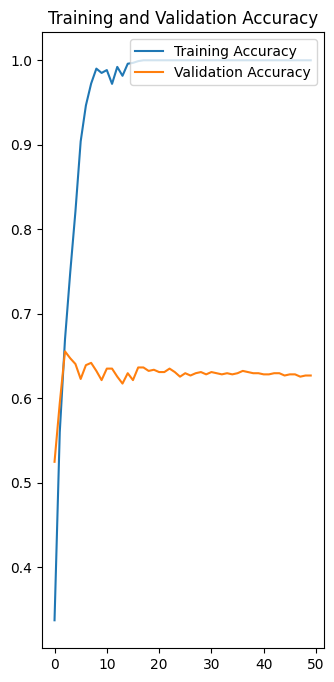

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc="upper right")
plt.title('Training and Validation Accuracy')
plt.show()

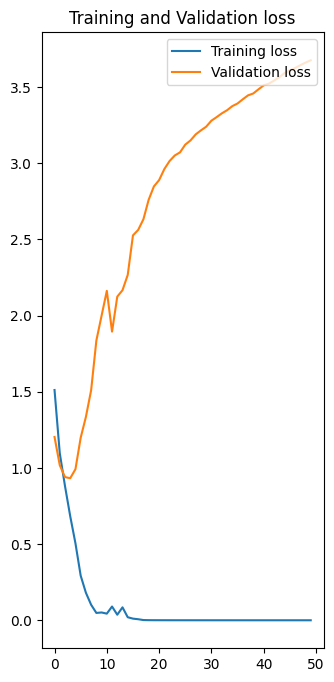

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc="upper right")
plt.title('Training and Validation loss')
plt.show()

In [33]:
save_model(model, "flower_model_trained.hdf5")

In [34]:
print("model saved successfully")

model saved successfully


In [35]:
model.score()

AttributeError: 'Sequential' object has no attribute 'score'